# EWRouter example

This notebook uses `OptiWindNet` to route the collector system cables via `EWRouter`.

### ⚡ EWRouter (Esau-Williams Heuristic)

`EWRouter` is a *fast and lightweight heuristic router* based on the *Esau-Williams algorithm*. It builds a spanning tree that connects turbines to substations while respecting cable capacity constraints. This method is especially suitable for *quick prototyping* and *large-scale layouts* where optimization speed is more important than global optimality.

> `EWRouter` is the default router used in `WindFarmNetwork`. If no router is specified when creating a `WindFarmNetwork` instance, `.optimize()` will automatically run with `EWRouter`.

#### 🔧 Constructor: `EWRouter(...)`

**Required arguments:**

* None -> You can instantiate `EWRouter()` without any arguments.

**Optional arguments:**

| Argument       | Type   | Description                                                                                                                                                          |
| -------------- | ------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `maxiter`      | `int`  | Maximum number of iterations (default: `10000`). Controls how long the heuristic explores the search space.                                                               |
| `feeder_route` | `str`  | Routing style:<br>• `"segmented"` *(default)*<br>• `"straight"` |
| `verbose`      | `bool` | If `True`, prints potential warnings during routing (default: `False`).                                                                                               |

**✅ Example**

```python
# Implicit use of EWRouter as default
wf = WindFarmNetwork(cables=..., turbinesC=..., substationsC=...)
wf.optimize()  # Uses EWRouter by default

# Explicitly use with custom options
router = EWRouter(feeder_route='straight', maxiter=5000)
wf = WindFarmNetwork(cables=..., turbinesC=..., substationsC=..., router=router)
wf.optimize()
```

>While `EWRouter` is very efficient, it’s a *heuristic* and does *not guarantee globally optimal* solutions. Use it when you need speed or when solving large problems where exact methods are too slow.

In [13]:
from optiwindnet.api import WindFarmNetwork, EWRouter

In [14]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [15]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=[(7, 2000.0)])

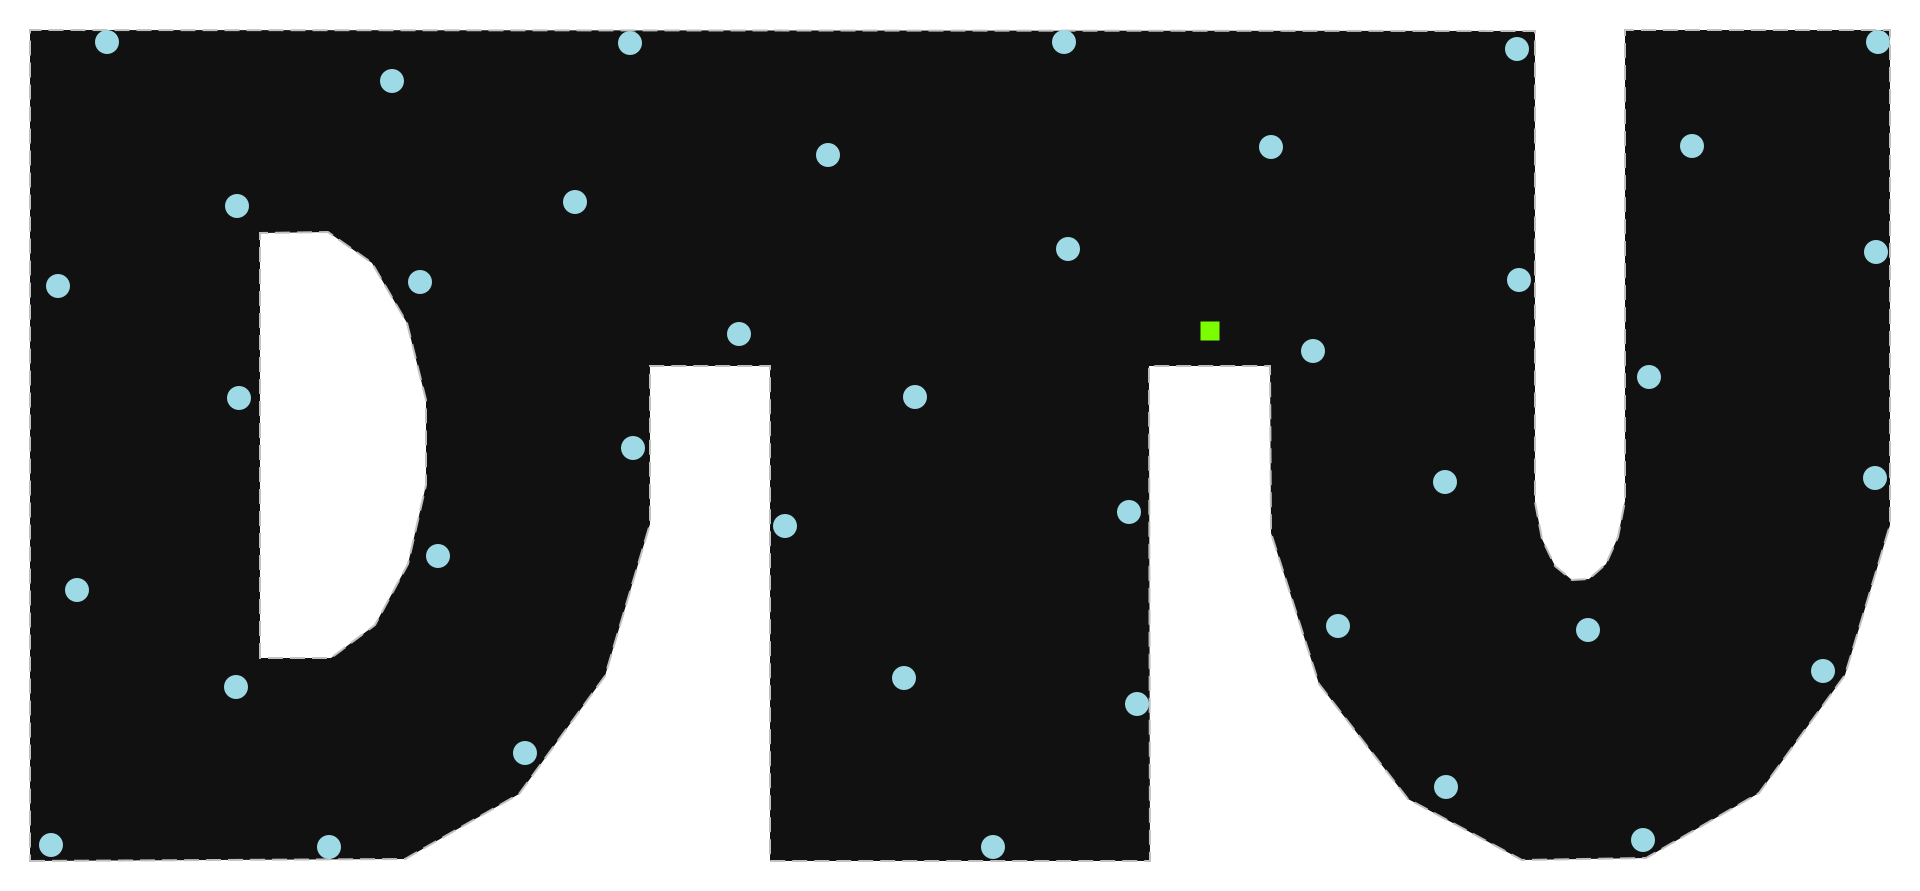

In [16]:
wfn

### Optimize with EWRouter

#### Optimize with default setting.

1820.1681190424422


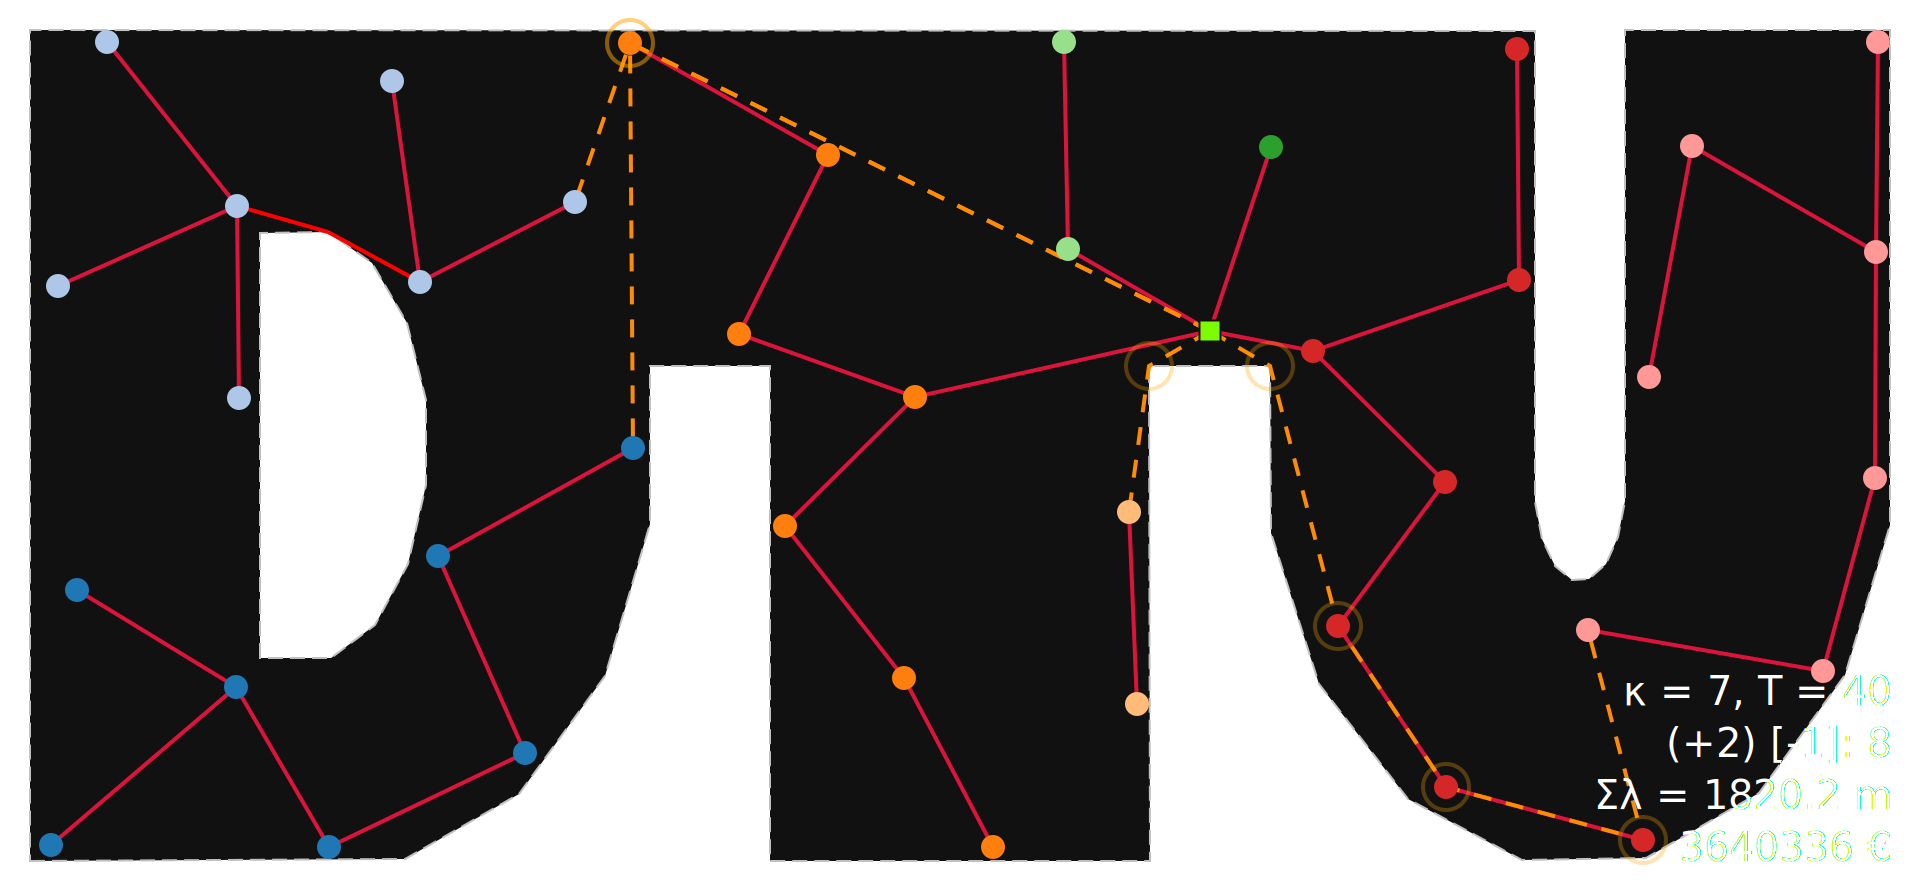

In [17]:
router = EWRouter()
res = wfn.optimize(router=router)
print(wfn.length())
wfn

#### Optimize with user-defined setting.

1707.0505869707904


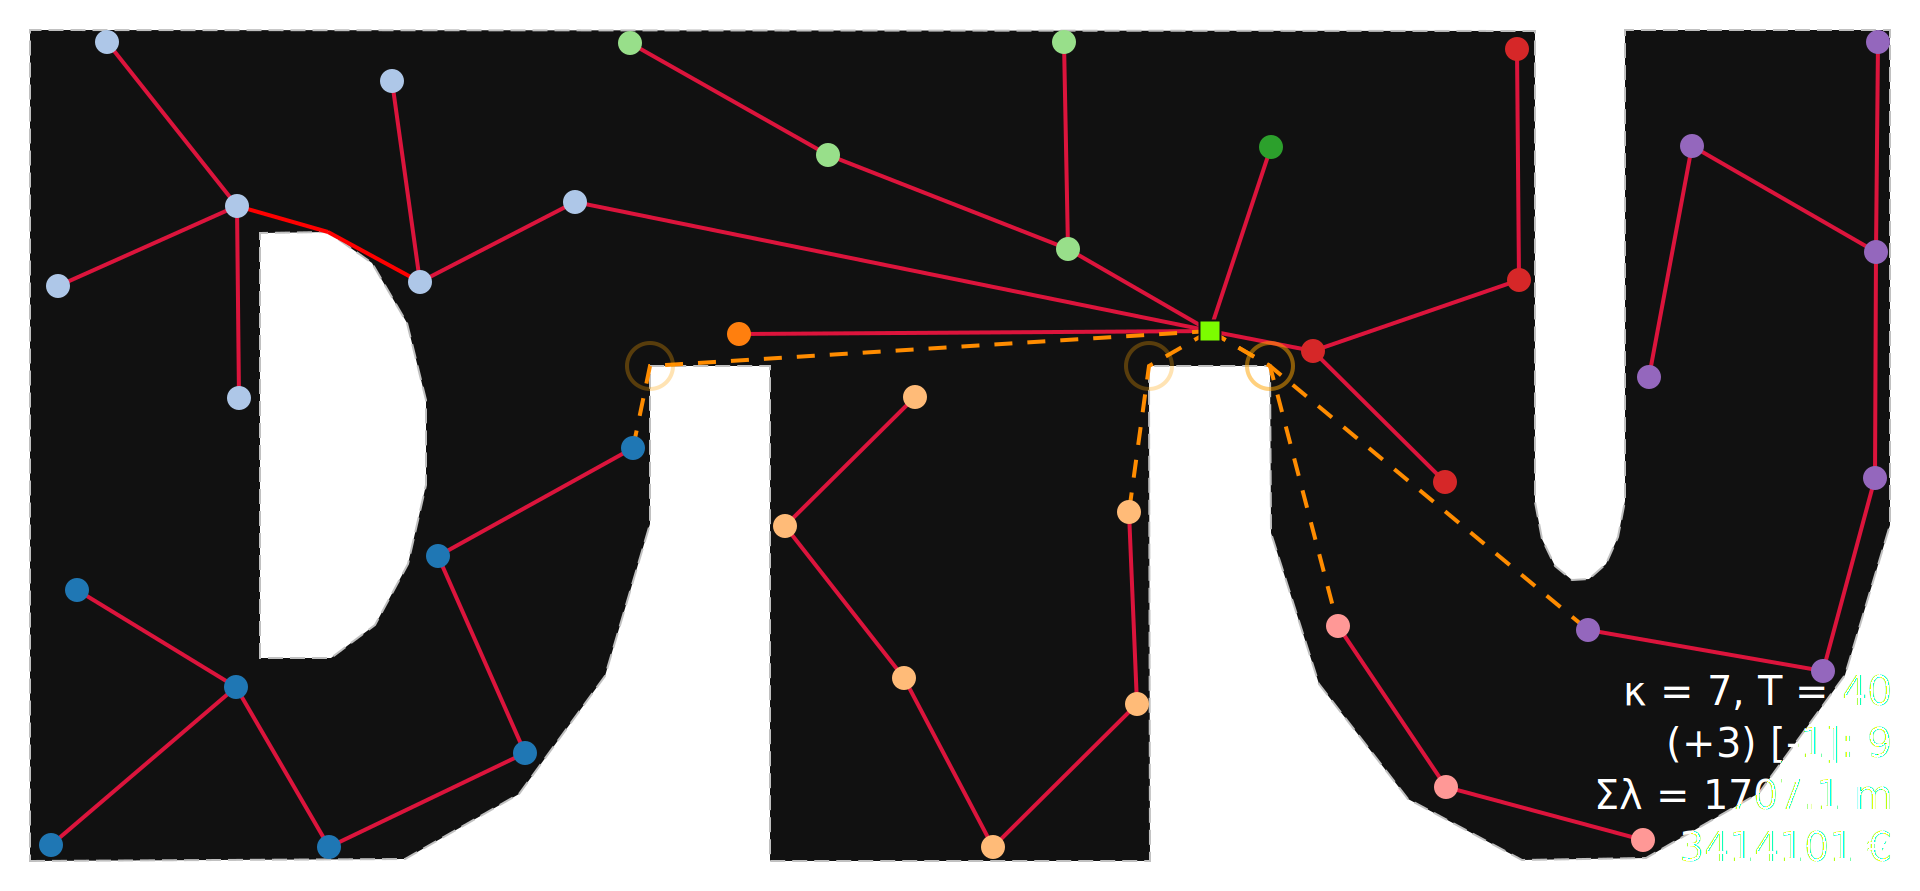

In [18]:
router = EWRouter(        
        maxiter=20000,
        feeder_route='straight',
        verbose=True)
res = wfn.optimize(router=router)
print(wfn.length())
wfn